In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Data showcase with pandas

In [2]:
df = pd.read_csv("VideoGames_sales.csv")
df.head(10)

,id,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06
5,5,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08
6,6,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09
7,7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26
8,8,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13
9,9,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13


In [10]:
df.shape

(64016, 13)

Connect to database

In [6]:
import mysql.connector
mydb = mysql.connector.connect(
    host="127.0.0.1",
    user = "root",
    password = "MySQL-S3rver",
    database = "videogame_sales"
)
cursor = mydb.cursor()
if mydb.is_connected():
    print("Connected to database")


Connected to database


Print everything from the database

In [7]:
sql = """
select * from sales
limit 15
;
"""
cursor.execute(sql)
myresult = cursor.fetchall()

for row in myresult:
    print(row)

(1, 'Grand Theft Auto V', 'PS3', 'Action', 'Rockstar Games', 'Rockstar North', 9.4, 20.32, 6.37, '0.99', 9.85, 3.12, '2013-09-17')
(2, 'Grand Theft Auto V', 'PS4', 'Action', 'Rockstar Games', 'Rockstar North', 9.7, 19.39, 6.06, '0.6', 9.71, 3.02, '2014-11-18')
(3, 'Grand Theft Auto: Vice City', 'PS2', 'Action', 'Rockstar Games', 'Rockstar North', 9.6, 16.15, 8.41, '0.47', 5.49, 1.78, '2002-10-28')
(4, 'Grand Theft Auto V', 'X360', 'Action', 'Rockstar Games', 'Rockstar North', None, 15.86, 9.06, '0.06', 5.33, 1.42, '2013-09-17')
(5, 'Call of Duty: Black Ops 3', 'PS4', 'Shooter', 'Activision', 'Treyarch', 8.1, 15.09, 6.18, '0.41', 6.05, 2.44, '2015-11-06')
(6, 'Call of Duty: Modern Warfare 3', 'X360', 'Shooter', 'Activision', 'Infinity Ward', 8.7, 14.82, 9.07, '0.13', 4.29, 1.33, '2011-11-08')
(7, 'Call of Duty: Black Ops', 'X360', 'Shooter', 'Activision', 'Treyarch', 8.8, 14.74, 9.76, '0.11', 3.73, 1.14, '2010-11-09')
(8, 'Red Dead Redemption 2', 'PS4', 'Action-Adventure', 'Rockstar Gam

Get all games with higher critic score than 9.5

In [10]:
sql = """
select title, console, critic_score
from sales
where critic_score > 9.5
"""
cursor.execute(sql)
myresult = cursor.fetchall()
for title, console, critic_score in myresult:
    print(title, console, critic_score)

Grand Theft Auto V PS4 9.7
Grand Theft Auto: Vice City PS2 9.6
Red Dead Redemption 2 PS4 9.8
Grand Theft Auto IV X360 10.0
Grand Theft Auto IV PS3 10.0
Call of Duty 4: Modern Warfare X360 9.6
Batman: Arkham City PS3 9.6
Tony Hawk's Pro Skater PS 9.6
Tony Hawk's Pro Skater 4 PS2 9.6
BioShock X360 9.6
Rockstar Games Double Pack: Grand Theft Auto III & Grand Theft Auto Vice City XB 9.8
Portal 2 X360 9.6
The Orange Box X360 9.7
Rockstar Games Double Pack: Grand Theft Auto III & Grand Theft Auto Vice City PS2 9.7
Portal 2 PS3 9.6
NFL 2K DC 9.7
Red Dead Redemption: Undead Nightmare PS3 10.0
Red Dead Redemption: Undead Nightmare X360 10.0
NFL 2K1 DC 9.6
The Walking Dead: A Telltale Games Series PS3 9.7
Mass Effect 2 PC 9.6
The Orange Box PC 9.7
Undertale PS4 9.7
God of War (2018) PS4 9.7
Resident Evil 4 PS2 9.6
Resident Evil 4 GC 9.6
Final Fight SNES 10.0
Metal Gear Solid GB 9.6
The Legend of Zelda: Ocarina of Time N64 9.9
The Legend of Zelda: A Link to the Past SNES 10.0
The Legend of Zelda:

Show each publisher's critic_score mean and sort by that mean


In [11]:
sql = """
select publisher, AVG(critic_score)
from sales
group by publisher
order by AVG(critic_score) desc;
"""
cursor.execute(sql)
myresult = cursor.fetchall()
for publisher, critic_score in myresult:
    print(publisher, critic_score)


Toby Fox 9.7
Valve 9.34
Merge Games 9.3
Psyonix Studios 9.2
The Fullbright Company 9.1
Soedesco 9.0
Perp Games 9.0
2025-04-08 00:00:00 9.0
Villa Gorilla 9.0
Oddworld Inhabitants 9.0
Broderbund 8.9
Microprose 8.899999999999999
ESP 8.85
Zombie Cow Studios 8.8
Fox Interactive 8.700000000000001
Devolver Digital 8.7
The Astronauts 8.7
Sam Barlow 8.7
RedOctane 8.683333333333335
Blizzard Entertainment 8.65
MTV Games 8.563157894736843
Rockstar Games 8.516417910447762
Sony Interactive Entertainment 8.5
Bandai Namco Games 8.5
Team17 Software 8.5
Halfbrick Studios 8.5
Finji 8.5
PopCap Games 8.433333333333334
Sold Out 8.4
Strategy First 8.4
Team 17 8.4
Perfect World Entertainment 8.4
Ysbryd Games 8.4
Horberg Productions 8.350000000000001
O3 Entertainment 8.3
Funcom 8.3
Edmund McMillen 8.3
Gameloft 8.25
Lionhead Studios 8.2
Campo Santo 8.2
EA Sports BIG 8.100000000000001
Taito 8.1
Westwood Studios 8.1
Nobilis 8.1
Shin'en 8.1
Bandai Namco Entertainment 8.080000000000002
Square 8.06
Sony Computer Ent

Showcase the 5 most sold games (all the sales from different consoles) from the dataset with matplotlib

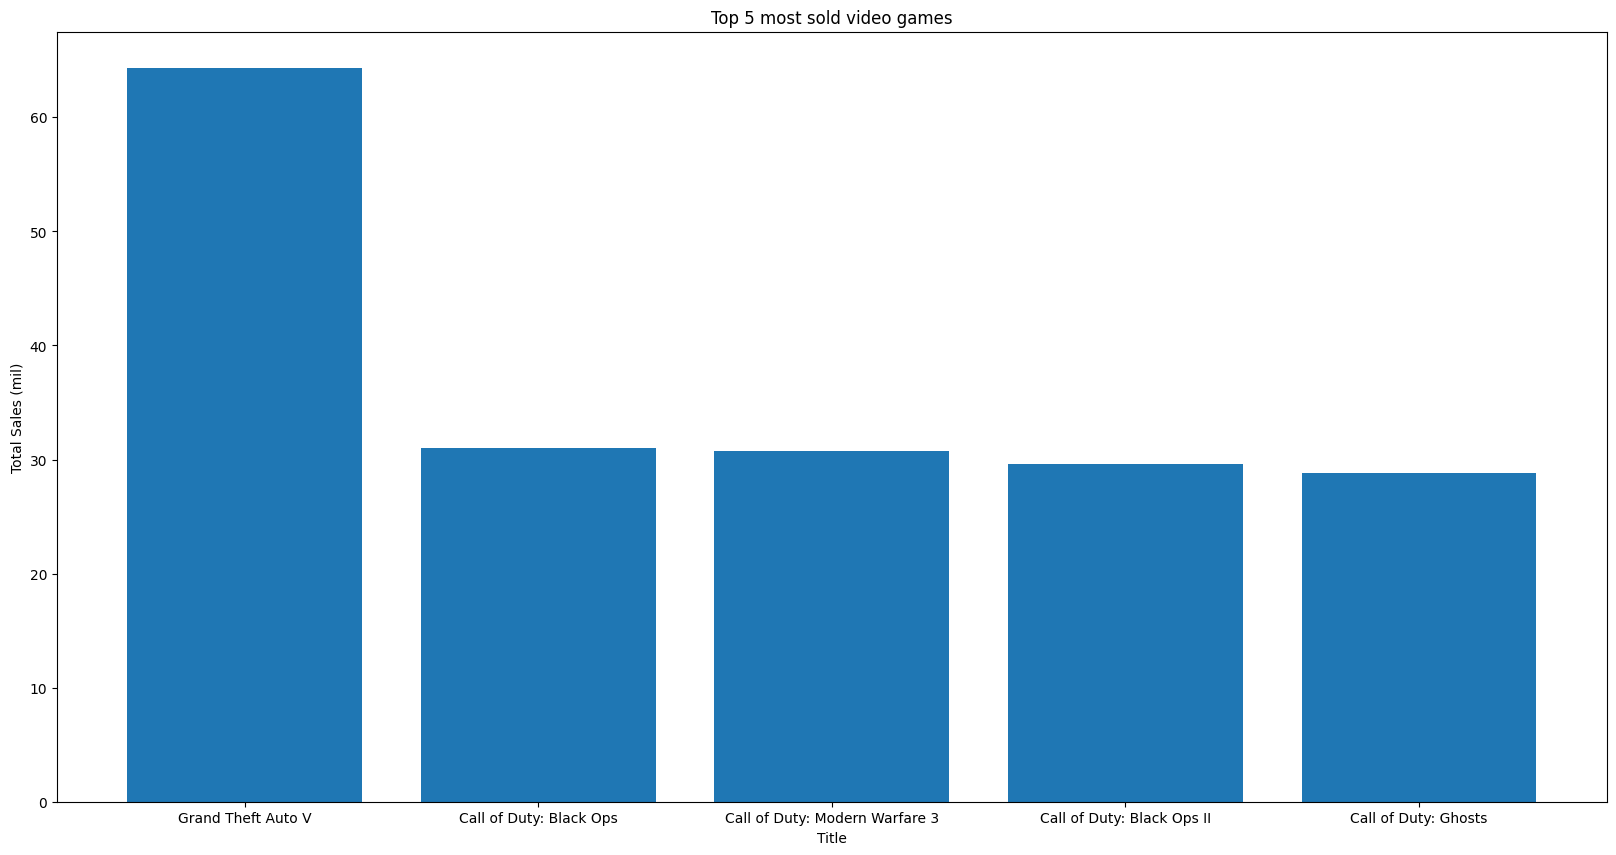

In [12]:
sql = """
select title, sum(total_sales)
from sales
group by title
order by sum(total_sales) desc
limit 5;
"""
cursor.execute(sql)
myresult = cursor.fetchall()

title = []
total_sales = []
for row in myresult:
    title.append(row[0])
    total_sales.append(row[1])

#visualize the data
plt.figure(figsize = (20,10))
plt.bar(title, total_sales)
plt.xlabel("Title")
plt.ylabel("Total Sales (mil)")
plt.title("Top 5 most sold video games")
plt.show()

Insert and delete from the database

In [8]:
sql = """
insert into sales  (title, console, genre, publisher, developer, critic_score, total_sales)
VALUES (%s, %s, %s, %s, %s, %s, %s)
"""
values = [
    ("Wii sports", "Wii","Sports" ,"Nintendo","Nintendo", 8.1, 82.9),
    ("Minecraft", "X360", "Adventure", "4J Studios", "Microsoft Studios", 8.3, 22)
]

for value in values:
    cursor.execute(sql, value)

mydb.commit()

sql = """
select * from sales
where title = "Wii sports"
"""

cursor.execute(sql)
myresult = cursor.fetchall()

print(myresult)

[(29472, 'Wii sports', 'Wii', 'Sports', 'Nintendo', 'Nintendo', 8.1, 82.9, None, None, None, None, None)]


In [9]:
sql = """
DELETE FROM sales WHERE title = "Wii sports";
"""

cursor.execute(sql)

sql = """
DELETE FROM sales WHERE title = "Minecraft" and console = "X360";
"""
cursor.execute(sql)

mydb.commit()